# Interactive University Selection Widget Example

This notebook demonstrates how to use the analyzed DeepTechFinder university data to create interactive widgets for university selection and analysis.

In [1]:
# Import required libraries
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Add scripts directory to path to import our data loader functions
sys.path.append('./scripts')

# Import our data loader functions
from university_data_loader import (
    get_university_names, 
    get_university_info, 
    get_universities_dataframe,
    get_summary_stats,
    create_widget_options,
    search_universities
)

## Summary Statistics

First, let's look at the overall statistics from the DeepTechFinder dataset:

In [2]:
# Display summary statistics
summary = get_summary_stats()
print("=== DeepTechFinder University Dataset Summary ===")
print(f"Total Universities: {summary['total_universities']}")
print(f"Total Students: {summary['total_students']:,}")
print(f"Total Patent Applications: {summary['total_applications']:,}")
print(f"Total Granted Patents: {summary['total_granted']:,}")
print(f"Overall Grant Rate: {summary['overall_grant_rate']}%")

=== DeepTechFinder University Dataset Summary ===
Total Universities: 100
Total Students: 1,789,466
Total Patent Applications: 11,118
Total Granted Patents: 4,907
Overall Grant Rate: 44.1%


## Interactive University Selector Widget

This widget allows you to select a university and view its detailed statistics:

In [3]:
# Create interactive university selector
def create_university_selector():
    # Get widget options
    options = create_widget_options()
    
    # Create widgets
    sort_dropdown = widgets.Dropdown(
        options=list(options.keys()),
        value='By Application Count',
        description='Sort by:',
        style={'description_width': 'initial'}
    )
    
    uni_dropdown = widgets.Dropdown(
        options=options['By Application Count'],
        value=options['By Application Count'][0],
        description='University:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='500px')
    )
    
    output = widgets.Output()
    
    def update_universities(*args):
        sort_by_map = {
            'Alphabetical': 'alphabetical',
            'By Student Count': 'by_students', 
            'By Application Count': 'by_applications',
            'By Granted Patents': 'by_granted',
            'By Grant Rate': 'by_grant_rate'
        }
        
        new_options = get_university_names(sort_by_map[sort_dropdown.value])
        uni_dropdown.options = new_options
        uni_dropdown.value = new_options[0]
    
    def display_university_info(*args):
        with output:
            output.clear_output()
            
            if uni_dropdown.value:
                info = get_university_info(uni_dropdown.value)
                if info:
                    html = f"""
                    <div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 10px; background-color: #f9f9f9;">
                        <h3 style="color: #2E7D32; margin-top: 0;">{info['name']}</h3>
                        <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px;">
                            <div>
                                <h4>📊 Patent Statistics</h4>
                                <p><strong>Total Applications:</strong> {info['total_applications']:,}</p>
                                <p><strong>Granted Patents:</strong> {info['granted_patents']:,}</p>
                                <p><strong>Grant Rate:</strong> {info['grant_rate']}%</p>
                            </div>
                            <div>
                                <h4>🎓 University Info</h4>
                                <p><strong>Total Students:</strong> {info['total_students']:,}</p>
                                <p><strong>Patents per 1000 Students:</strong> {(info['total_applications'] / info['total_students'] * 1000):.1f}</p>
                            </div>
                        </div>
                    </div>
                    """
                    display(HTML(html))
    
    # Connect event handlers
    sort_dropdown.observe(update_universities, names='value')
    uni_dropdown.observe(display_university_info, names='value')
    
    # Initial display
    display_university_info()
    
    return widgets.VBox([sort_dropdown, uni_dropdown, output])

# Create and display the widget
university_widget = create_university_selector()
display(university_widget)

## Search Widget

Search for universities by name:

In [4]:
# Create search widget
def create_search_widget():
    search_box = widgets.Text(
        placeholder='Enter search term (e.g., "Berlin", "Technical", "Munich")',
        description='Search:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )
    
    output = widgets.Output()
    
    def search_and_display(*args):
        with output:
            output.clear_output()
            
            if search_box.value.strip():
                results = search_universities(search_box.value.strip())
                
                if results:
                    print(f"Found {len(results)} universities matching '{search_box.value}':")
                    for i, uni in enumerate(results, 1):
                        info = get_university_info(uni)
                        if info:
                            print(f"{i:2d}. {uni:<50} | Students: {info['total_students']:>6,} | Apps: {info['total_applications']:>3} | Granted: {info['granted_patents']:>3} ({info['grant_rate']:>5.1f}%)")
                else:
                    print(f"No universities found matching '{search_box.value}'")
    
    search_box.observe(search_and_display, names='value')
    
    return widgets.VBox([search_box, output])

# Create and display search widget
search_widget = create_search_widget()
display(search_widget)

## Data Visualization

Create visualizations using the university data:

/tmp/ipykernel_8476/1925738820.py:40: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_8476/1925738820.py:40: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


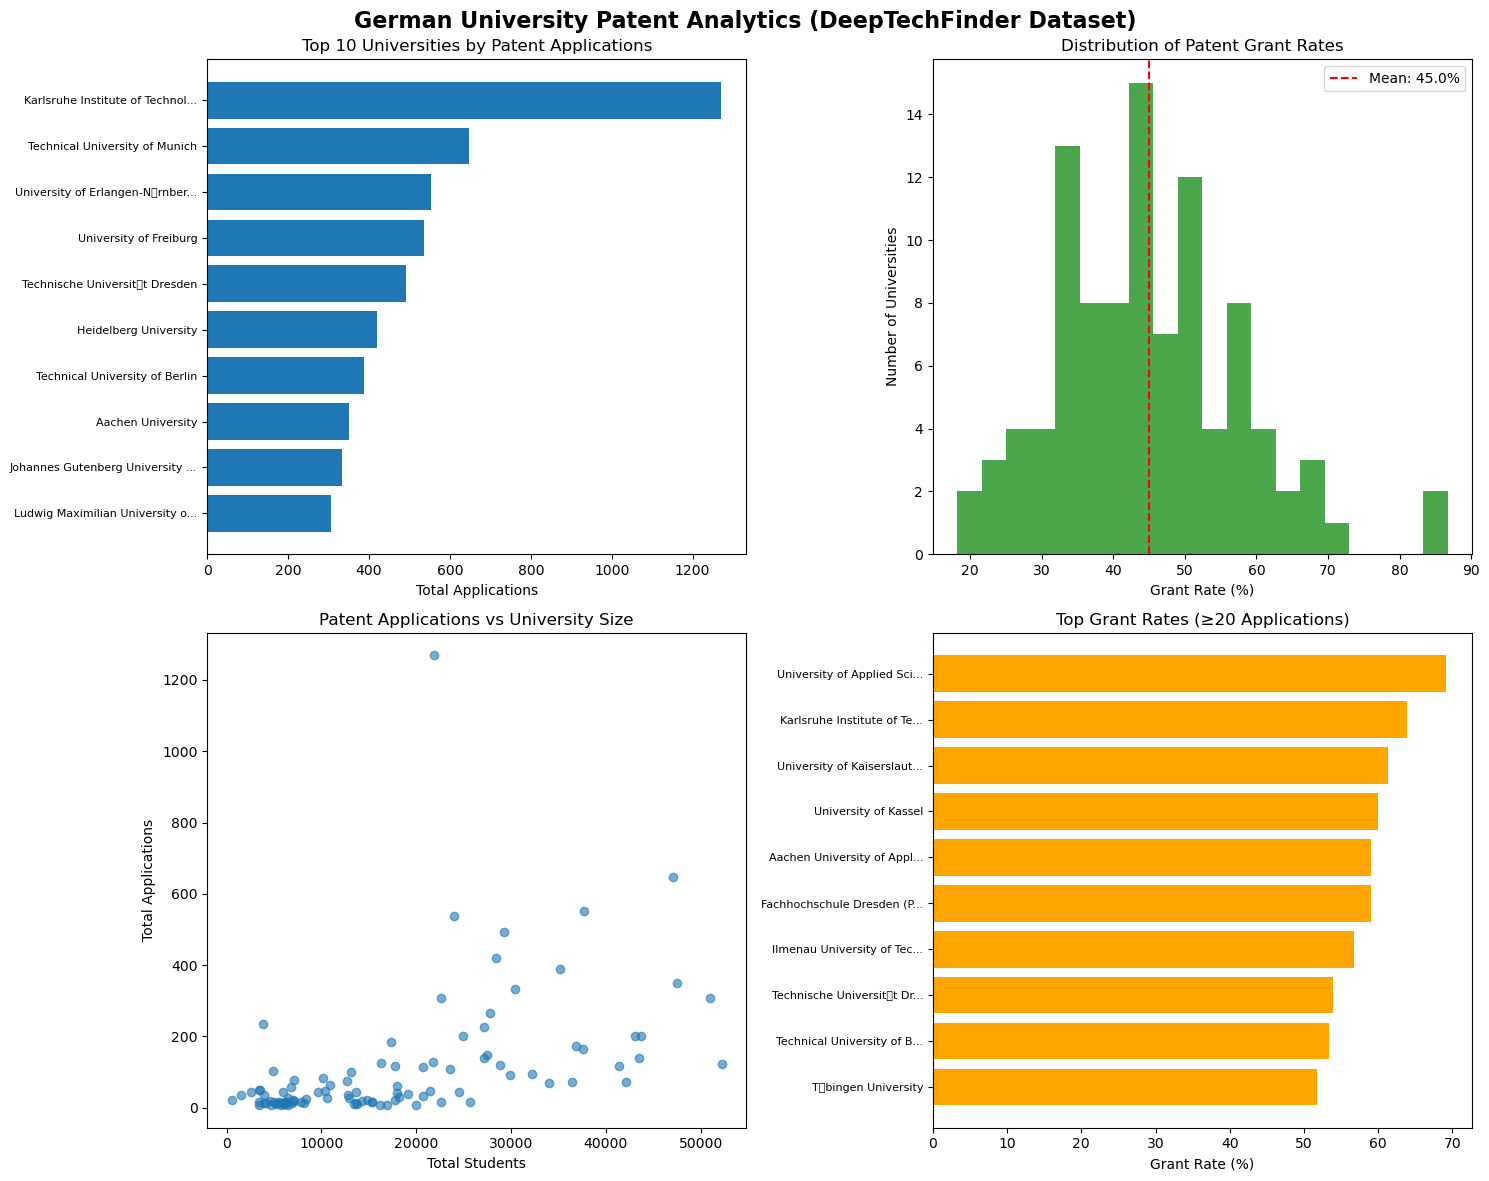


=== Key Insights ===
Highest grant rate (≥20 apps): University of Applied Sciences and Arts Hildesheim/Holzminden/Gttingen (69.2%)
Most applications: Karlsruhe Institute of Technology (1269 applications)
Largest university: University of Cologne (52,204 students)
Most patents per 1000 students: Hannover Medical School (61.2 per 1000)


In [5]:
# Get data as DataFrame for visualization
df = get_universities_dataframe('by_applications')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('German University Patent Analytics (DeepTechFinder Dataset)', fontsize=16, fontweight='bold')

# Top 10 by applications
top_10_apps = df.head(10)
axes[0,0].barh(range(len(top_10_apps)), top_10_apps['total_applications'])
axes[0,0].set_yticks(range(len(top_10_apps)))
axes[0,0].set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_10_apps['name']], fontsize=8)
axes[0,0].set_xlabel('Total Applications')
axes[0,0].set_title('Top 10 Universities by Patent Applications')
axes[0,0].invert_yaxis()

# Grant rate distribution
axes[0,1].hist(df['grant_rate'], bins=20, alpha=0.7, color='green')
axes[0,1].axvline(df['grant_rate'].mean(), color='red', linestyle='--', label=f'Mean: {df["grant_rate"].mean():.1f}%')
axes[0,1].set_xlabel('Grant Rate (%)')
axes[0,1].set_ylabel('Number of Universities')
axes[0,1].set_title('Distribution of Patent Grant Rates')
axes[0,1].legend()

# Applications vs Students scatter
axes[1,0].scatter(df['total_students'], df['total_applications'], alpha=0.6)
axes[1,0].set_xlabel('Total Students')
axes[1,0].set_ylabel('Total Applications')
axes[1,0].set_title('Patent Applications vs University Size')

# Top 10 by grant rate (minimum 20 applications)
high_volume = df[df['total_applications'] >= 20].sort_values('grant_rate', ascending=False).head(10)
axes[1,1].barh(range(len(high_volume)), high_volume['grant_rate'], color='orange')
axes[1,1].set_yticks(range(len(high_volume)))
axes[1,1].set_yticklabels([name[:25] + '...' if len(name) > 25 else name for name in high_volume['name']], fontsize=8)
axes[1,1].set_xlabel('Grant Rate (%)')
axes[1,1].set_title('Top Grant Rates (≥20 Applications)')
axes[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

# Display some interesting insights
print("\n=== Key Insights ===")
print(f"Highest grant rate (≥20 apps): {high_volume.iloc[0]['name']} ({high_volume.iloc[0]['grant_rate']}%)")
print(f"Most applications: {df.iloc[0]['name']} ({df.iloc[0]['total_applications']} applications)")
print(f"Largest university: {df.sort_values('total_students', ascending=False).iloc[0]['name']} ({df.sort_values('total_students', ascending=False).iloc[0]['total_students']:,} students)")
print(f"Most patents per 1000 students: {df.assign(patents_per_1000=(df['total_applications']/df['total_students']*1000)).sort_values('patents_per_1000', ascending=False).iloc[0]['name']} ({(df.assign(patents_per_1000=df['total_applications']/df['total_students']*1000).sort_values('patents_per_1000', ascending=False).iloc[0]['patents_per_1000']):.1f} per 1000)")

## Export Data for Further Analysis

Get the complete dataset as a DataFrame for your own analysis:

In [6]:
# Get complete dataframe
complete_df = get_universities_dataframe('alphabetical')

# Display first few rows
print("Complete University Dataset:")
display(complete_df.head(10))

# Show data types and basic stats
print("\nDataset Info:")
print(complete_df.info())

print("\nBasic Statistics:")
display(complete_df.describe())

Complete University Dataset:


,name,total_students,total_applications,granted_patents,grant_rate
0,Aachen University,47521,351,137,39.0
1,Aachen University of Applied Sciences,14792,22,13,59.1
2,Aalen University,5746,7,3,42.9
3,Anhalt University of Applied Sciences,7052,23,10,43.5
4,Aschaffenburg University of Applied Sciences,3424,7,4,57.1
5,Bauhaus-Universitt Weimar,3988,12,6,50.0
6,Berlin University of Applied Sciences,14326,20,7,35.0
7,Bielefeld University,24488,43,17,39.5
8,Brandenburg University of Technology (BTU) Cot...,6830,58,23,39.7
9,Brunswick University of Technology,17794,118,57,48.3



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                100 non-null    object 
 1   total_students      100 non-null    int64  
 2   total_applications  100 non-null    int64  
 3   granted_patents     100 non-null    int64  
 4   grant_rate          100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
None

Basic Statistics:


,total_students,total_applications,granted_patents,grant_rate
count,100.000000,100.000000,100.000000,100.000000
mean,17894.660000,111.180000,49.070000,45.027000
std,13059.065944,175.880433,94.716297,12.896471
min,550.000000,7.000000,2.000000,18.200000
25%,6415.500000,16.000000,8.000000,35.275000
50%,15044.500000,44.000000,21.000000,43.750000
75%,26041.250000,123.000000,49.250000,51.625000
max,52204.000000,1269.000000,811.000000,86.700000
